In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import iqr

In [6]:
data = pd.read_excel('Online_Retail.xlsx')
print(data.head())

  InvoiceNo StockCode                          Description  Quantity   
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6  \
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


In [3]:
data.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [27]:
data = data.dropna()
data.drop_duplicates
# print(data.isna().sum())

data[data.select_dtypes(include=[np.number]) < 0] = np.nan
data.dropna()
print(data)

       InvoiceNo StockCode                          Description  Quantity   
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6  \
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  
0      

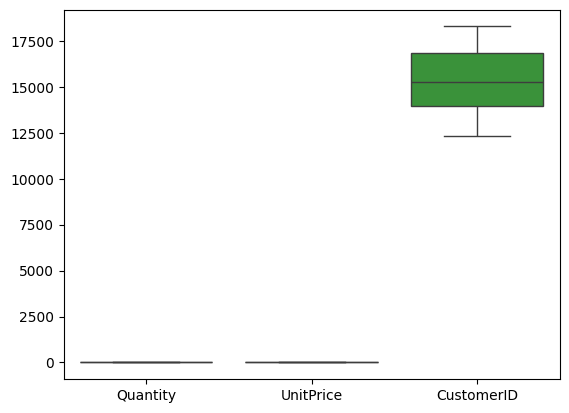

In [28]:
sns.boxplot(data)
plt.show()

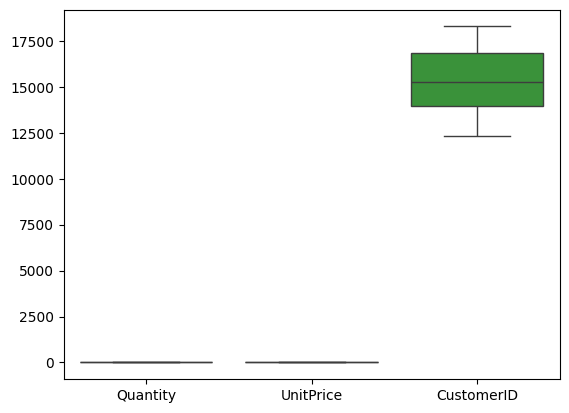

In [29]:
iqr_quantity = iqr(data['Quantity'])
lower_thresold_quantity = np.quantile(data['Quantity'], 0.25) - 1.5 * iqr_quantity
upper_thresold_quantity = np.quantile(data['Quantity'], 0.75) + 1.5 * iqr_quantity
data = data[(data['Quantity'] >= lower_thresold_quantity) & (data['Quantity'] <= upper_thresold_quantity)]

iqr_unitprice = iqr(data['UnitPrice'])
lower_thresold_unitprice = np.quantile(data['UnitPrice'], 0.25) - 1.5 * iqr_unitprice
upper_thresold_unitprice = np.quantile(data['UnitPrice'], 0.75) + 1.5 * iqr_unitprice
data = data[(data['UnitPrice'] >= lower_thresold_unitprice) & (data['UnitPrice'] <= upper_thresold_unitprice)]

iqr_customerid = iqr(data['CustomerID'])
lower_thresold_customerid = np.quantile(data['CustomerID'], 0.25) - 1.5 * iqr_customerid
upper_thresold_customerid = np.quantile(data['CustomerID'], 0.75) + 1.5 * iqr_customerid
Customer_data = data[(data['CustomerID'] >= lower_thresold_customerid) & (data['CustomerID'] <= upper_thresold_customerid)]

sns.boxplot(Customer_data)
plt.show()

In [30]:
Customer_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 328540 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    328540 non-null  object        
 1   StockCode    328540 non-null  object        
 2   Description  328540 non-null  object        
 3   Quantity     328540 non-null  int64         
 4   InvoiceDate  328540 non-null  datetime64[ns]
 5   UnitPrice    328540 non-null  float64       
 6   CustomerID   328540 non-null  float64       
 7   Country      328540 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 22.6+ MB


In [32]:
Customer_data['TotalAmountSpend'] = Customer_data['Quantity'] * Customer_data['UnitPrice']

In [33]:
Customer_data.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalAmountSpend
count,328540.000000,328540,328540.000000,328540.000000,328540.000000
mean,7.517770,2011-07-12 21:17:48.907104512,2.003722,15321.926103,12.009965
min,0.000000,2010-12-01 08:26:00,0.000000,12347.000000,0.000000
25%,2.000000,2011-04-08 10:26:00,0.950000,13985.000000,3.400000
50%,6.000000,2011-08-03 14:07:00,1.650000,15241.000000,9.900000
75%,12.000000,2011-10-23 14:47:00,2.950000,16818.000000,16.600000
max,27.000000,2011-12-09 12:50:00,5.500000,18287.000000,147.150000
std,6.842894,NaN,1.286148,1714.098597,12.012238


                            mean     50%          std
TotalAmountSpent     2048.688081  668.57  8985.230220
TotalItemsPurchased  1187.644537  378.00  5043.619654


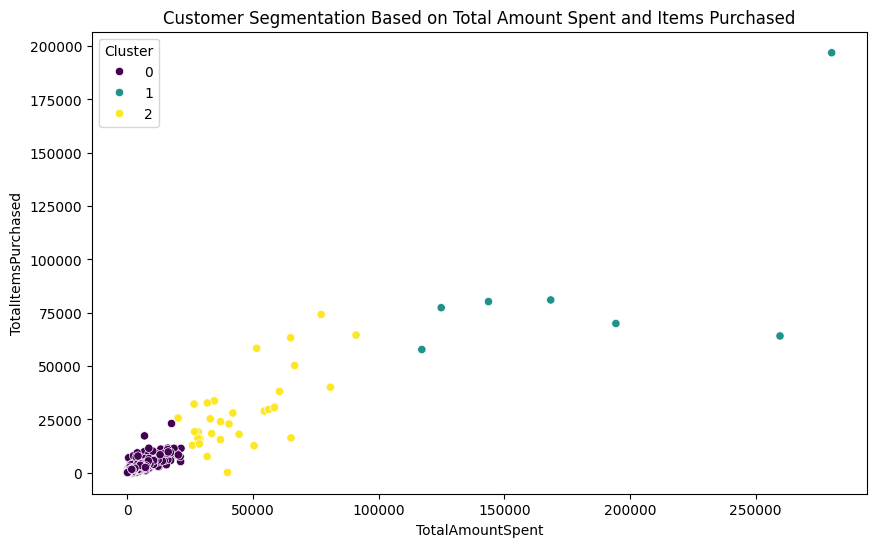

           CustomerID  TotalAmountSpent  TotalItemsPurchased   
Cluster                                                        
0        15300.831124       1428.634248           838.702489  \
1        15446.571429     184080.341429         89627.285714   
2        15211.593750      45529.620938         28719.656250   

                     LastPurchaseDate  AveragePurchaseValue  
Cluster                                                      
0       2011-09-07 21:05:24.214933760             32.193744  
1       2011-12-03 09:08:00.000000000           8251.112703  
2       2011-11-10 04:42:05.624999936           3140.020056  
Cluster 0: Inactive Customers - Provide discounts or targeted marketing campaigns.
Cluster 1: High Spenders - Offer loyalty rewards or premium services.
Cluster 2: Inactive Customers - Provide discounts or targeted marketing campaigns.


In [8]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
def load_data(file_path):
    """Load the dataset from an Excel file."""
    return pd.read_excel(file_path)

# Data Cleaning
def clean_data(data):
    """Handle missing values, remove duplicates, and fix inconsistencies."""
    # Drop rows with missing CustomerID
    data = data.dropna(subset=['CustomerID'])
    # Remove duplicate rows
    data = data.drop_duplicates()
    # Filter out negative or zero quantities and prices
    data = data[(data['Quantity'] > 0) & (data['UnitPrice'] > 0)]
    return data

# Create a summary dataset by CustomerID
# Create a summary dataset by CustomerID
def create_customer_summary(data):
    """Generate summary statistics for each customer."""
    # Calculate TotalAmountSpent by multiplying Quantity and UnitPrice
    data['TotalAmountSpent'] = data['Quantity'] * data['UnitPrice']
    
    # Aggregate the data by CustomerID
    summary = data.groupby('CustomerID').agg(
        TotalAmountSpent=pd.NamedAgg(column='TotalAmountSpent', aggfunc='sum'),
        TotalItemsPurchased=pd.NamedAgg(column='Quantity', aggfunc='sum'),
        LastPurchaseDate=pd.NamedAgg(column='InvoiceDate', aggfunc='max'),
        AveragePurchaseValue=pd.NamedAgg(column='TotalAmountSpent', aggfunc='mean')
    ).reset_index()
    return summary

# Calculate descriptive statistics
def descriptive_stats(data):
    """Calculate and print mean, median, and standard deviation of key columns."""
    stats = data[['TotalAmountSpent', 'TotalItemsPurchased']].describe().T
    print(stats[['mean', '50%', 'std']])

# Customer Segmentation using KMeans
def customer_segmentation(data, n_clusters=4):
    """Perform KMeans clustering to segment customers."""
    features = data[['TotalAmountSpent', 'TotalItemsPurchased', 'AveragePurchaseValue']]
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    data['Cluster'] = kmeans.fit_predict(features)
    return data, kmeans

# Visualize customer segments
def visualize_segments(data):
    """Create scatter plots to visualize customer segments."""
    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        data=data, x='TotalAmountSpent', y='TotalItemsPurchased',
        hue='Cluster', palette='viridis'
    )
    plt.title('Customer Segmentation Based on Total Amount Spent and Items Purchased')
    plt.show()

# Provide insights for each customer segment
def segment_insights(data):
    """Generate insights by calculating the mean of each segment."""
    stat_penguins = data.groupby('Cluster').mean()
    print(stat_penguins)
    return stat_penguins

# Engagement recommendations based on segment insights
def engagement_recommendations(stat_penguins):
    """Provide engagement recommendations for each segment."""
    for cluster, stats in stat_penguins.iterrows():
        if stats['TotalAmountSpent'] > stat_penguins['TotalAmountSpent'].mean():
            print(f"Cluster {cluster}: High Spenders - Offer loyalty rewards or premium services.")
        elif stats['TotalItemsPurchased'] > stat_penguins['TotalItemsPurchased'].mean():
            print(f"Cluster {cluster}: Frequent Shoppers - Send personalized product recommendations.")
        else:
            print(f"Cluster {cluster}: Inactive Customers - Provide discounts or targeted marketing campaigns.")

# Main function to orchestrate the analysis
def main(file_path):
    data = load_data(file_path)
    data = clean_data(data)
    customer_summary = create_customer_summary(data)
    descriptive_stats(customer_summary)
    
    # Perform customer segmentation
    segmented_data, kmeans_model = customer_segmentation(customer_summary)
    visualize_segments(segmented_data)
    
    # Get insights and recommendations
    stat_penguins = segment_insights(segmented_data)
    engagement_recommendations(stat_penguins)

# Run the analysis
if __name__ == "__main__":
    main('Online_Retail.xlsx')


In [25]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
data = pd.read_excel('Online_Retail.xlsx')
print(data.head())

  InvoiceNo StockCode                          Description  Quantity   
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6  \
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


In [27]:
data.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [28]:
data = data.dropna()
data = data.drop_duplicates()
data = data[(data['Quantity'] > 0) & (data['UnitPrice'] > 0)]

In [29]:
print(data.isna().sum())

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [30]:
data['TotalAmountSpent'] = data['Quantity'] * data['UnitPrice']
data.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalAmountSpent
count,392692.000000,392692,392692.000000,392692.000000,392692.000000
mean,13.119702,2011-07-10 19:13:07.771892480,3.125914,15287.843865,22.631500
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000,0.001000
25%,2.000000,2011-04-07 11:12:00,1.250000,13955.000000,4.950000
50%,6.000000,2011-07-31 12:02:00,1.950000,15150.000000,12.450000
75%,12.000000,2011-10-20 12:53:00,3.750000,16791.000000,19.800000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000,168469.600000
std,180.492832,NaN,22.241836,1713.539549,311.099224


In [31]:
customer_summary = data.groupby('CustomerID').agg(
    TotalAmountSpent=pd.NamedAgg(column='TotalAmountSpent', aggfunc='sum'),
    TotalItemsPurchased=pd.NamedAgg(column='Quantity', aggfunc='sum'),
    LastPurchaseDate=pd.NamedAgg(column='InvoiceDate', aggfunc='max'),
    AveragePurchaseValue=pd.NamedAgg(column='TotalAmountSpent', aggfunc='mean')
).reset_index()

# Print basic statistics for TotalAmountSpent and TotalItemsPurchased
stats = customer_summary[['TotalAmountSpent', 'TotalItemsPurchased']].describe().T
print(stats[['mean', '50%', 'std']])

                            mean     50%          std
TotalAmountSpent     2048.688081  668.57  8985.230220
TotalItemsPurchased  1187.644537  378.00  5043.619654


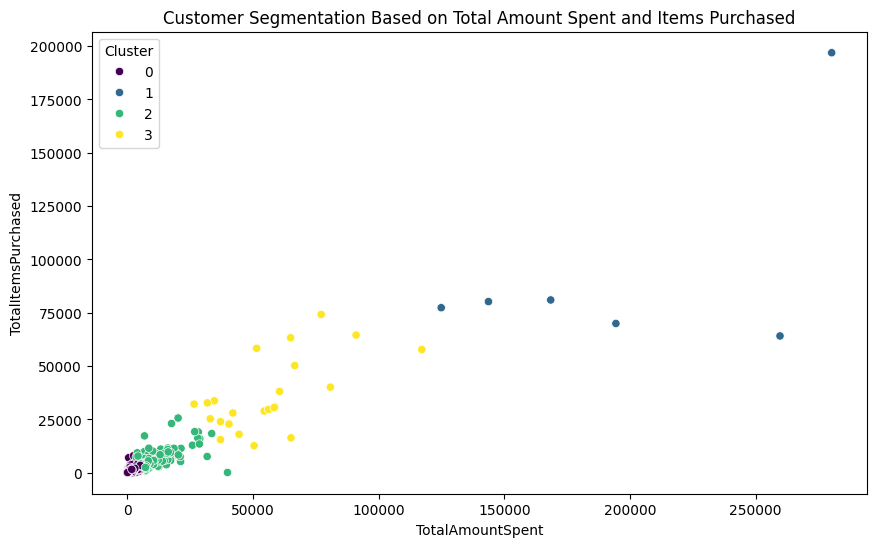

In [32]:
# Select features for clustering
features = customer_summary[['TotalAmountSpent', 'TotalItemsPurchased', 'AveragePurchaseValue']]

# Apply KMeans with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
customer_summary['Cluster'] = kmeans.fit_predict(features)
# Scatter plot to visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=customer_summary, 
    x='TotalAmountSpent', y='TotalItemsPurchased',
    hue='Cluster', palette='viridis'
)
plt.title('Customer Segmentation Based on Total Amount Spent and Items Purchased')
plt.show()

In [19]:
# Generate segment insights by calculating the mean for each cluster
cluster_insights = customer_summary.groupby('Cluster').mean()
print(cluster_insights)


           CustomerID  TotalAmountSpent  TotalItemsPurchased   
Cluster                                                        
0        15320.349671       1048.711652           626.682760  \
1        15661.666667     195225.385000         94937.166667   
2        14909.259615      10257.443221          5693.283654   
3        15187.826087      55719.213478         36006.521739   

                     LastPurchaseDate  AveragePurchaseValue  
Cluster                                                      
0       2011-09-04 10:03:51.748354048             30.237916  
1       2011-12-03 20:50:20.000000000           9612.294559  
2       2011-11-18 08:55:25.961538560            139.979321  
3       2011-11-08 21:16:33.913043456           3732.355481  


In [20]:
# Provide recommendations based on cluster insights
for cluster, stats in cluster_insights.iterrows():
    if stats['TotalAmountSpent'] > cluster_insights['TotalAmountSpent'].mean():
        print(f"Cluster {cluster}: High Spenders - Offer loyalty rewards or premium services.")
    elif stats['TotalItemsPurchased'] > cluster_insights['TotalItemsPurchased'].mean():
        print(f"Cluster {cluster}: Frequent Shoppers - Send personalized product recommendations.")
    else:
        print(f"Cluster {cluster}: Inactive Customers - Provide discounts or targeted marketing campaigns.")

Cluster 0: Inactive Customers - Provide discounts or targeted marketing campaigns.
Cluster 1: High Spenders - Offer loyalty rewards or premium services.
Cluster 2: Inactive Customers - Provide discounts or targeted marketing campaigns.
Cluster 3: Frequent Shoppers - Send personalized product recommendations.
